In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]

#load exp1 csv file
df = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/7d22d2bee8313cca97a1d24ec9749d14179a1dce/unit03_mult_lin_reg/exp1.csv',
index_col = False, header = None, delim_whitespace = False, names = names, na_values = float)

#Show first six lines
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


In [3]:
#Check index
df.index

RangeIndex(start=0, stop=8000, step=1)

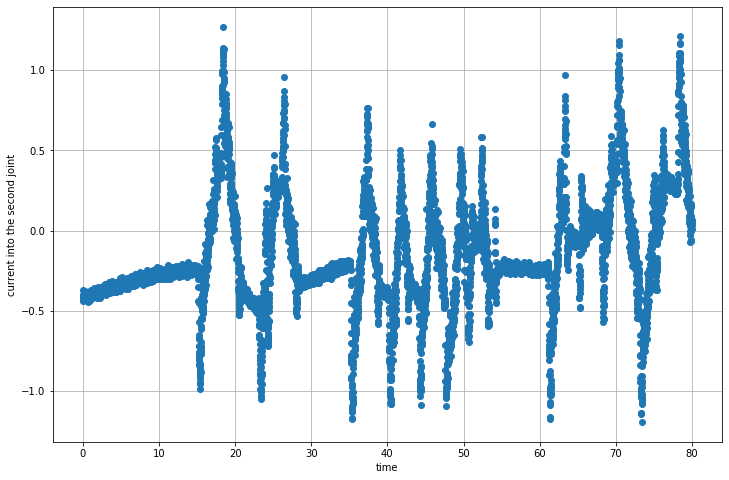

In [29]:
y = np.array(df['I2'])
t = np.array(df['t'])

#Skretch
plt.figure(figsize=(12,8))
plt.plot(t,y,'o')
plt.xlabel('time')
plt.ylabel('current into the second joint')
plt.grid(True)
plt.show()

In [5]:
ytrain = df['I2']
xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

#Use model imported from sklearn package
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
regr.coef_

array([ 0.06255018,  0.20584896,  0.00118784,  0.00044457, -0.0031362 ,
        0.00603298,  0.05487097])

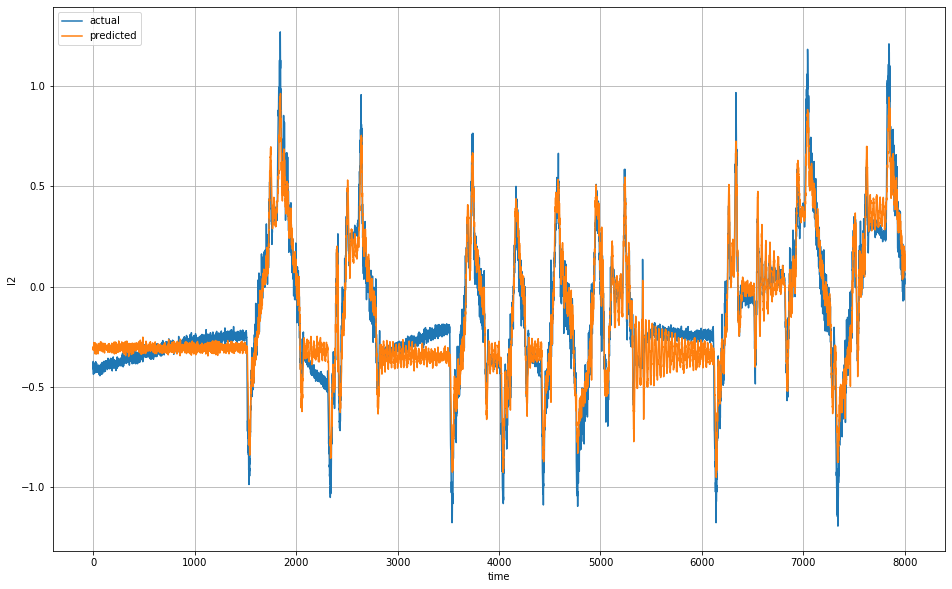

In [22]:
y_tr_pred = regr.predict(xtrain)

plt.figure(figsize = (16,10))
plt.plot(df.index, ytrain)
plt.plot(df.index, y_tr_pred)
plt.xlabel('time')
plt.ylabel('I2')
plt.legend(['actual', 'predicted'])
plt.grid()
plt.show()

In [25]:
RSS_train = np.mean((y_tr_pred-ytrain)**2)/(np.std(ytrain)**2)

In [42]:
#Display Train
print("Normalized RSS of Train = {0:f}".format(RSS_train))

Normalized RSS of Train = 0.095833


In [34]:
#Load exp2 csv file
df2 = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/7d22d2bee8313cca97a1d24ec9749d14179a1dce/unit03_mult_lin_reg/exp2.csv',
                 index_col = False, header = None, delim_whitespace = False, names = names, na_values = float)

#Show first six lines
df2.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.13410,-0.045712,6.210306e-319,1.582900
1,0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.05820,0.125580,1.766878e-319,0.414660
2,0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.29520,-0.130080,4.990557e-320,0.082286
3,0.03,0.000013,1.9024,0.26099,0.001409,4.940656e-321,0.013933,-0.079923,-0.15304,-0.023807,-135.57,-48.019,-11.3410,-0.79168,0.213010,1.394253e-320,0.190650
4,0.04,-0.000007,1.9024,0.26110,-0.001273,4.940656e-321,0.010793,-0.025507,-0.12924,-0.006802,-135.81,-49.204,-12.0520,-2.21390,-0.276490,3.581976e-321,-0.170400
5,0.05,-0.000007,1.9024,0.26124,0.001928,4.940656e-321,0.011915,-0.083324,-0.14964,-0.034010,-139.60,-53.471,-16.0820,-6.95450,0.323560,1.141292e-321,0.031745


In [36]:
#Check index
df2.index

RangeIndex(start=0, stop=8000, step=1)

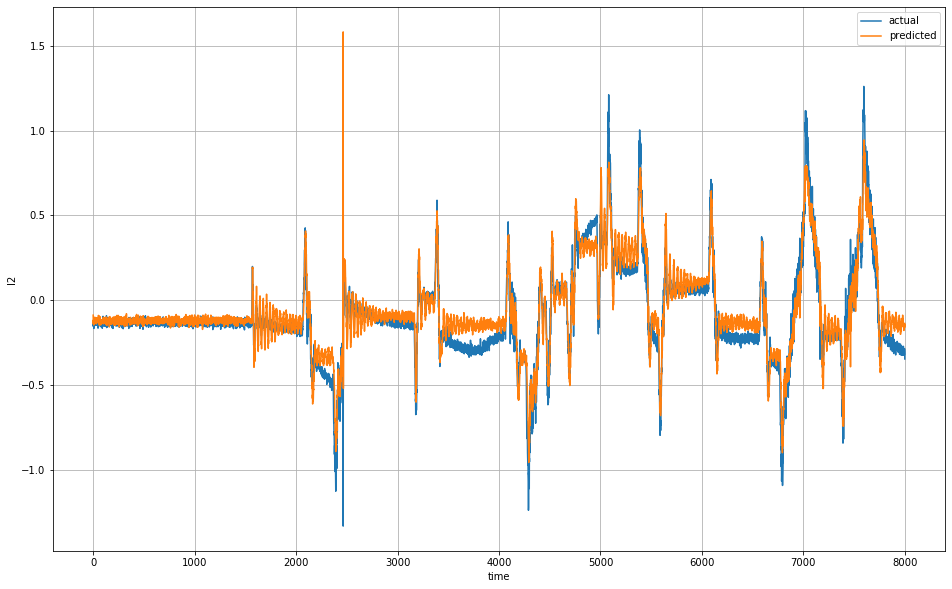

In [40]:
ytest=df2['I2']
xtest=df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
y_te_pred = regr.predict(xtest)
#Skretch
plt.figure(figsize = (16,10))
plt.plot(df2.index, ytest)
plt.plot(df2.index, y_te_pred)
plt.xlabel('time')
plt.ylabel('I2')
plt.legend(['actual', 'predicted'])
plt.grid()
plt.show()

In [41]:
RSS_test = np.mean((y_te_pred-ytest)**2)/(np.std(ytest)**2)

In [43]:
#Display Test
print("Normalized RSS of Test = {0:f}".format(RSS_test))

Normalized RSS of Test = 0.126780
